1)Supervised Learning Algorithm:
Linear Regression for House Price Prediction

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving house_data2.csv to house_data2.csv


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['house_data2.csv']))
print(df)

             id             date   price  bedrooms  bathrooms  sqft_living  \
0    7129300520  20141013T000000  221900         3       1.00         1180   
1    6414100192  20141209T000000  538000         3       2.25         2570   
2    5631500400  20150225T000000  180000         2       1.00          770   
3    2487200875  20141209T000000  604000         4       3.00         1960   
4    1954400510  20150218T000000  510000         3       2.00         1680   
..          ...              ...     ...       ...        ...          ...   
994  5147600105  20140721T000000  178500         2       1.00          740   
995  7437100570  20140821T000000  291000         4       2.50         1860   
996  8856004730  20140917T000000  199950         2       2.75         1590   
997  3856902996  20140804T000000  553500         2       1.00          850   
998  3856902996  20140804T000000  553500         2       1.00          850   

     sqft_lot  floors  waterfront  view  ...  grade  sqft_above

Checking missing values

In [ ]:
print(df.isnull().sum())  # Counting missing values per column



id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split  #This function is commonly used to split a dataset into training and testing subsets for model evaluation.
from sklearn.linear_model import LinearRegression     #LinearRegression is a machine learning model that fits a linear equation to a dataset

# Loading the dataset
data = pd.read_csv('house_data2.csv')



In [ ]:
# Splitting the dataset into features and target variable
X = data[['sqft_living', 'bedrooms', 'bathrooms']]
y = data['price']



In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



X refers to the input features (independent variables).
y refers to the target variable (dependent variable).
test_size specifies the proportion of the dataset to allocate for testing.
In this case, 20% of the data will be used for testing, while the remaining 80% will be used for training.
random_state sets a seed value to ensure reproducibility.

In [ ]:
# Creating and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

This line fits the linear regression model to the training data, allowing it to learn the relationships between the input features (X_train) and the target variable (y_train).

In [ ]:
# Predicting house prices using the trained model
predictions = model.predict(X_test)


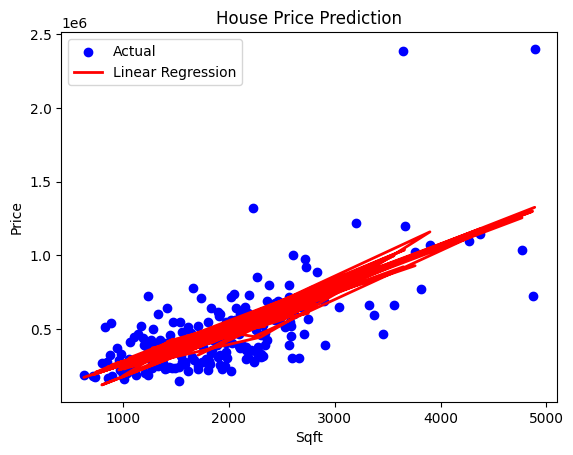

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of the actual house prices
plt.scatter(X_test['sqft_living'], y_test, color='blue', label='Actual')
plt.xlabel('Sqft')
plt.ylabel('Price')


# Plotting the linear regression line
plt.plot(X_test['sqft_living'], predictions, color='red', linewidth=2, label='Linear Regression')
plt.legend()

plt.title('House Price Prediction')
plt.show()


2) Supervised Learning Algorithm: Logistic Regression for approval status of credit applications

In [1]:
from google.colab import files

uploaded = files.upload()

Saving creditcard.csv to creditcard.csv


In [4]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
print(df)

     Gender    Age    Debt  Married  BankCustomer         Industry Ethnicity  \
0         1  30.83   0.000        1             1      Industrials     White   
1         0  58.67   4.460        1             1        Materials     Black   
2         0  24.50   0.500        1             1        Materials     Black   
3         1  27.83   1.540        1             1      Industrials     White   
4         1  20.17   5.625        1             1      Industrials     White   
..      ...    ...     ...      ...           ...              ...       ...   
685       1  21.08  10.085        0             0        Education     Black   
686       0  22.67   0.750        1             1           Energy     White   
687       0  25.25  13.500        0             0       Healthcare    Latino   
688       1  17.92   0.205        1             1  ConsumerStaples     White   
689       1  35.00   3.375        1             1           Energy     Black   

     YearsEmployed  PriorDefault  Emplo

Checking Missing Values

In [5]:
print(df.isnull().sum())  # Counting missing values per column

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split  #This function is commonly used to split a dataset into training and testing subsets for model evaluation.
from sklearn.linear_model import LogisticRegression   #LogisticRegression is a is a statistical algorithm used for binary or multi-class classification problems.
from sklearn.metrics import accuracy_score, classification_report

# Loading the dataset
data = pd.read_csv('creditcard.csv')



In [7]:
# Splitting the dataset into features and target variable
X = data.drop('Approved', axis=1)
y = data['Approved']


In [8]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



X refers to the input features (independent variables). y refers to the target variable (dependent variable). test_size specifies the proportion of the dataset to allocate for testing. In this case, 20% of the data will be used for testing, while the remaining 80% will be used for training. random_state sets a seed value to ensure reproducibility.

In [9]:
# Creating and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


ValueError: ignored

An error saying that it cannot convert string to float
ML moodels require numeric array for training the model
In such case we will use label Encoding

label encoding is a technique of data pre processing where it assigns the string vaues between 0 and 1

fit_transform() is used for learning and transforming the learned parameters on the training data in single step

In [10]:
from sklearn.preprocessing import LabelEncoder

# Creating an instance of the LabelEncoder
encoder = LabelEncoder()

# Applying label encoding to the categorical variables in X_train
X_train_encoded = X_train.copy()                   # Creating a copy of the training data

for column in X_test.columns.values:               # Iterating over the categorical columns
    X_train_encoded[column] = encoder.fit_transform(X_train[column])

# Applying label encoding to the target variable y_train (if it is categorical)

y_train_encoded = y_train.copy()                # Creating a copy of the target variable
if y_train.dtype == 'object':                   # Checking if y_train is categorical
    y_train_encoded = encoder.fit_transform(y_train)


In [11]:
model = LogisticRegression()
model.fit(X_train_encoded, y_train_encoded)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

The goal is to find the coefficients that minimize the difference between the predicted probabilities and the actual target values.

In [14]:
# Predict approval status using the trained model
predictions = model.predict(X_train_encoded)

#The trained model is used to predict the approval status of credit applications for the testing set using predict()


The model's performance is evaluated by calculating the accuracy using accuracy_score and generating a classification report using classification_report. The accuracy and classification report are  printed.

In [17]:
# Evaluate the model
accuracy = accuracy_score(y_train_encoded, predictions)
report = classification_report(y_train_encoded, predictions)

print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")


Accuracy: 0.8623188405797102
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       315
           1       0.83      0.86      0.84       237

    accuracy                           0.86       552
   macro avg       0.86      0.86      0.86       552
weighted avg       0.86      0.86      0.86       552

